## Build Decision Tree Model on Social Network Ads data

In [317]:
# Importing libraries for analysis and loading the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve


dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [319]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [321]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [323]:
dataset.drop("User ID", axis = 1, inplace = True)
dataset.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


<Axes: >

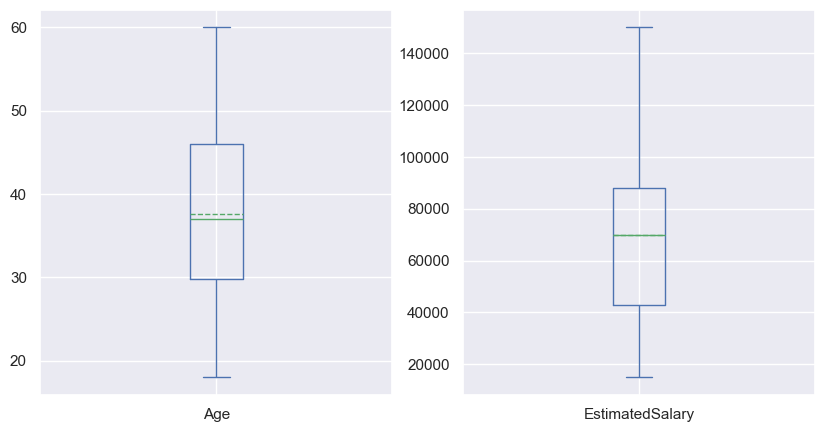

In [325]:
# Checking outliers
fig, ax = plt.subplots(1,2, figsize = (10, 5))
dataset['Age'].plot.box(ax = ax[0], showmeans = True, meanline = True)
dataset['EstimatedSalary'].plot.box(ax = ax[1], showmeans = True, meanline = True)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Purchased'}>, <Axes: >]], dtype=object)

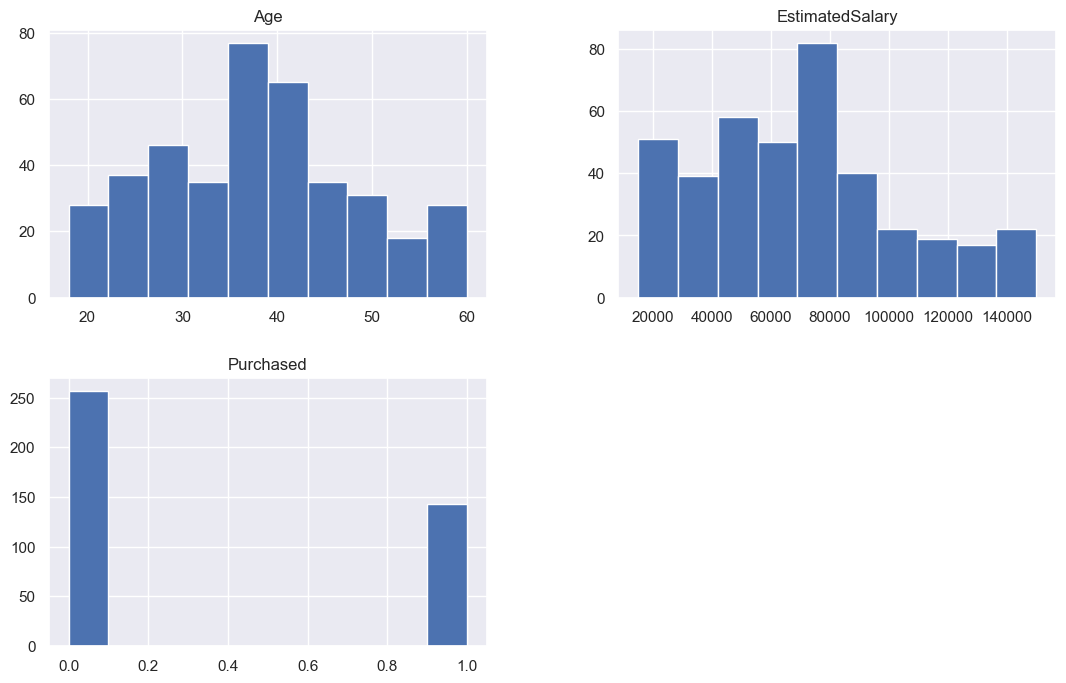

In [327]:
dataset.hist(figsize = (13, 8))

In [329]:
dataset['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: ylabel='count'>

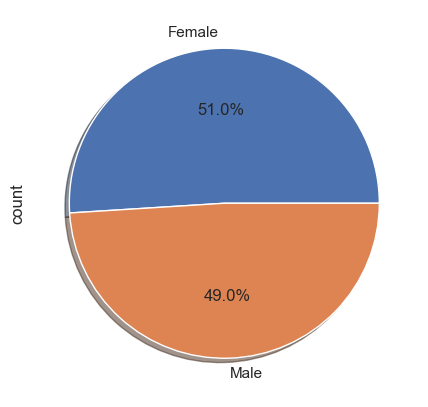

In [331]:
# pie plot
dataset['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (5, 8))

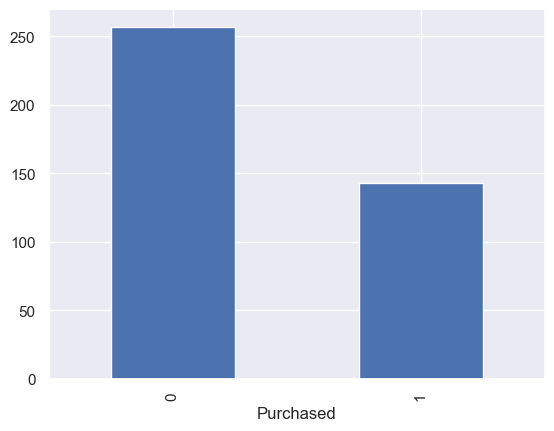

In [333]:
purchased = dataset['Purchased'].value_counts()
purchased.plot(kind='bar')
plt.show()

<Axes: ylabel='count'>

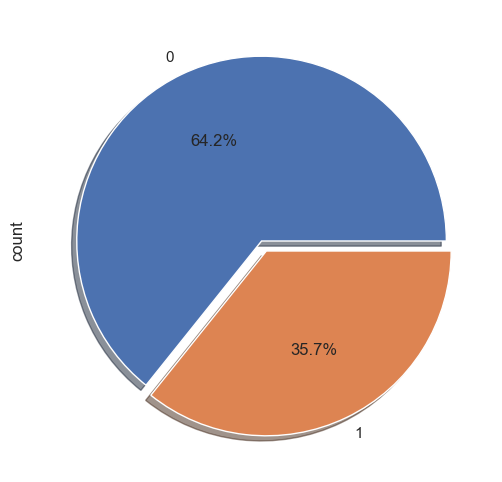

In [335]:
dataset['Purchased'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 6), explode = [0, 0.06])


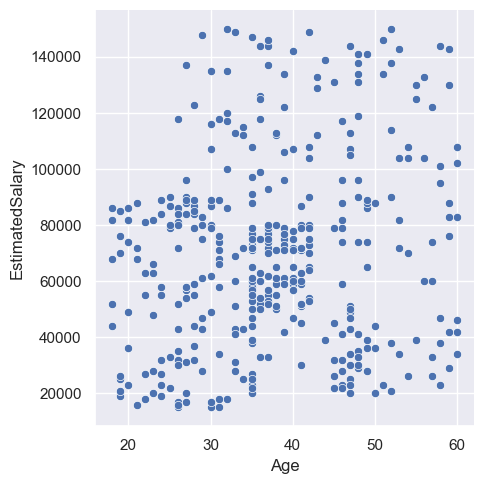

In [337]:
#Identify relation ship bet Age and estimated salary
sns.set_theme(style='darkgrid')
sns.relplot(x = 'Age' , y = 'EstimatedSalary', data = dataset)
plt.show()

<Figure size 400x400 with 0 Axes>

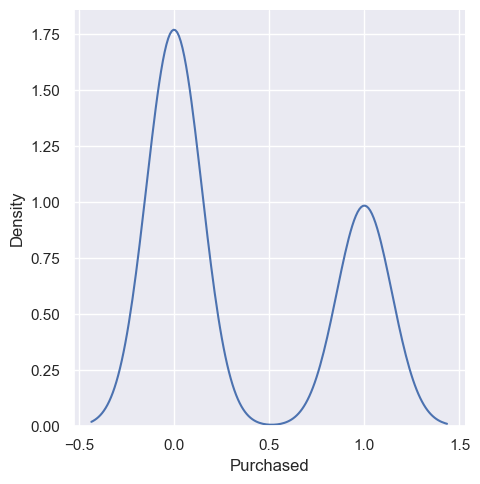

In [339]:
plt.figure(figsize=(4,4))
sns.displot(x = "Purchased", data=dataset, kind = 'kde')

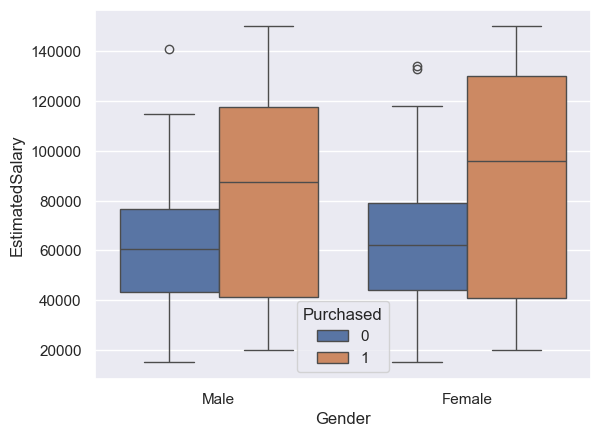

In [341]:
sns.boxplot(x="Gender", y="EstimatedSalary", data=dataset, hue = 'Purchased')
plt.show()

#### Theres is no use of Gender feature beacuse there is less effect of gender on purchased. So we will drop that feature.

In [343]:
dataset.drop("Gender", inplace = True, axis = 1)
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


<Axes: >

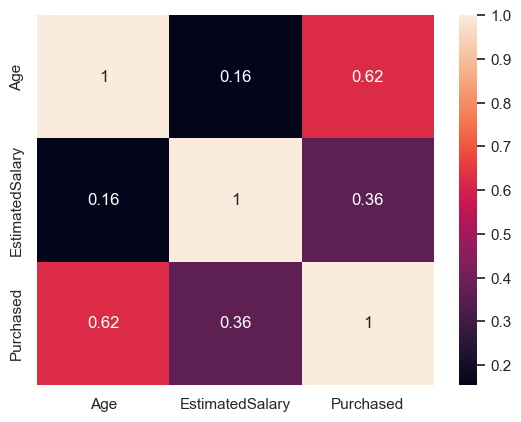

In [345]:
sns.heatmap(dataset.corr(), annot = True)

In [347]:
X = dataset.drop('Purchased', axis = 1)
y = dataset['Purchased']

In [349]:
X.shape, y.shape

((400, 2), (400,))

In [351]:
# Before scaling, split data into train & test part
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [353]:
X_train.shape

(300, 2)

In [355]:
X_test.shape

(100, 2)

In [357]:
y_train.shape

(300,)

In [175]:
y_test.shape

(100,)

In [359]:
# Now lets use Normalization scaling method
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [361]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [363]:
X_train.shape

(300, 2)

In [365]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [367]:
X_test.shape

(100, 2)

In [369]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier

#Create object
DTC = DecisionTreeClassifier()

# Fit data into model
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [371]:
# Test model
y_pred = DTC.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [373]:
# Evaluated model performsnce
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

[[62  6]
 [ 5 27]]


In [375]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100



In [377]:
# Build decision tree model
from sklearn.linear_model import LogisticRegression

#Create object
LR= LogisticRegression()

# Fit data into model
LR.fit(X_train, y_train)

LogisticRegression()

In [379]:
# Predict using X test data

y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [381]:
# Check LogReg Model performance
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[65  3]
 [ 8 24]]


In [383]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [385]:
# Build random forest model
from sklearn.ensemble import RandomForestClassifier

#Create object
RF= RandomForestClassifier()

# Fit data into model
RF.fit(X_train, y_train)

RandomForestClassifier()

In [387]:
# Predict using X test data

y_pred = RF.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [389]:
# Check Random Forest Model performance
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[63  5]
 [ 3 29]]


In [391]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [393]:
!pip install xgboost

In [394]:
# Build XGBoost model

from xgboost import XGBRFClassifier

#Create object
XG= XGBRFClassifier()

# Fit data into model
XG.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [397]:
# Predict using X test data

y_pred = XG.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [399]:
# Check LogReg Model performance
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[64  4]
 [ 2 30]]


In [401]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [403]:
# Build decision tree model
from sklearn.neighbors import KNeighborsClassifier

#Create object
KN = KNeighborsClassifier()

# Fit data into model
KN.fit(X_train, y_train)

KNeighborsClassifier()

In [405]:
# Predict using X test data

y_pred = KN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [407]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[64  4]
 [ 3 29]]


In [409]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [411]:
#Create object
GB = GradientBoostingClassifier()

# Fit data into model
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [413]:
# Predict using X test data

y_pred = GB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [415]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[64  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [417]:
#Create object
AB = AdaBoostClassifier()

# Fit data into model
AB.fit(X_train, y_train)

AdaBoostClassifier()

In [419]:
# Predict using X test data

y_pred = AB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [421]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[64  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [423]:
# Create object
SVC = SVC()

#fit data
SVC.fit(X_train, y_train)

SVC()

In [425]:
# Predict using X test data

y_pred = SVC.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [427]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [429]:
# Create object
NB = GaussianNB()

#fit data
NB.fit(X_train, y_train)

GaussianNB()

In [431]:
# Predict using X test data

y_pred = NB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [433]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[65  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [435]:
model_list = []
score_list = []

model1 = LogisticRegression()
model1.fit(X_train, y_train)
score1 = accuracy_score(y_test, model1.predict(X_test))
print("Model : Logistics Regression")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score1))
model_list.append('Logistic_Regression')
score_list.append(score1)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model1.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model1.predict(X_test))))

Model : Logistics Regression
Accuracy : 0.89
Recall_Score : 0.75
precission_Score : 0.89


In [437]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : RandomForestClassifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('RandomForestClassifier')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

Model : RandomForestClassifier
Accuracy : 0.92
Recall_Score : 0.91
precission_Score : 0.85


In [439]:
model3 = XGBRFClassifier()
model3.fit(X_train, y_train)
score3 = accuracy_score(y_test, model3.predict(X_test))
print("Model : XGBRFClassifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('XGBRFClassifier')
score_list.append(score3)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model3.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model3.predict(X_test))))

Model : XGBRFClassifier
Accuracy : 0.94
Recall_Score : 0.94
precission_Score : 0.88


In [441]:
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)
score4 = accuracy_score(y_test, model4.predict(X_test))
print("Model : KNeighborsClassifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('KNeighborsClassifier')
score_list.append(score4)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model4.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model4.predict(X_test))))

Model : KNeighborsClassifier
Accuracy : 0.93
Recall_Score : 0.91
precission_Score : 0.88


In [443]:
model5 = GradientBoostingClassifier()
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : GradientBoostingClassifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('GradientBoostingClassifier')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

Model : GradientBoostingClassifier
Accuracy : 0.91
Recall_Score : 0.84
precission_Score : 0.87


In [445]:
model6 = AdaBoostClassifier()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : AdaBoostClassifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('AdaBoostClassifier')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

Model : AdaBoostClassifier
Accuracy : 0.91
Recall_Score : 0.84
precission_Score : 0.87


In [457]:
model7 = GaussianNB()
model7.fit(X_train, y_train)
score7 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GaussianNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score7))
model_list.append('GaussianNB')
score_list.append(score7)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model7.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model7.predict(X_test))))

Model : GaussianNB
Accuracy : 0.91
Recall_Score : 0.78
precission_Score : 0.89


<Axes: >

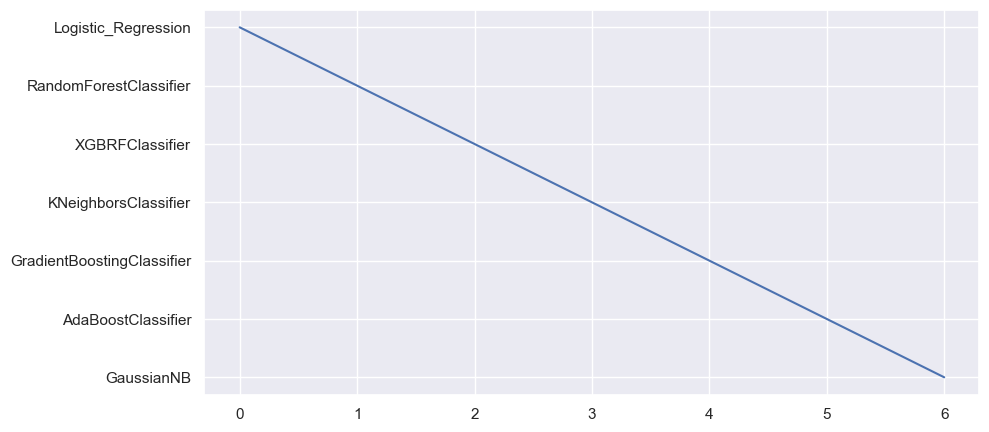

In [465]:
plt.figure(figsize=(10, 5))
sns.lineplot(model_list)

<Axes: >

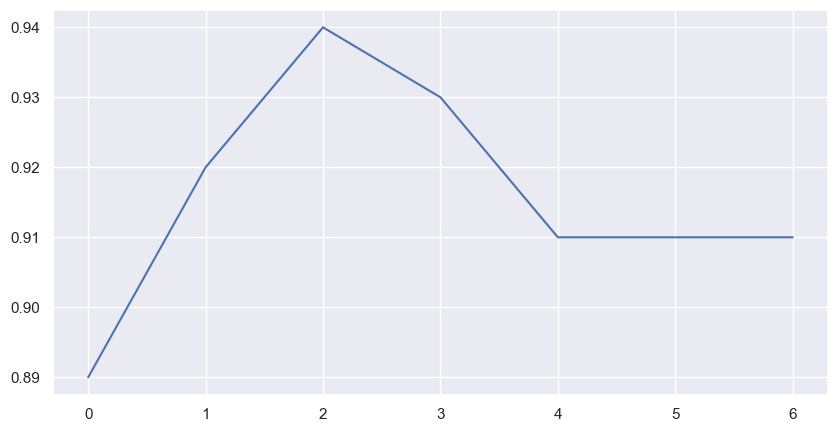

In [467]:
plt.figure(figsize=(10, 5))
sns.lineplot(score_list)